###  Part 1 take home exercise

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [53]:
X.ix[0:100:10,:]


C:\Users\pkw\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3,soc.religion.christian
20,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...,3,soc.religion.christian
30,From: vgwlu@dunsell.calgary.chevron.com (greg ...,2,sci.med
40,From: david-s@hsr.no (David A. Sjoen) Subject:...,3,soc.religion.christian
50,From: ab@nova.cc.purdue.edu (Allen B) Subject:...,1,comp.graphics
60,From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...,0,alt.atheism
70,From: weaver@chdasic.sps.mot.com (Dave Weaver)...,3,soc.religion.christian
80,From: annick@cortex.physiol.su.oz.au (Annick A...,2,sci.med
90,Subject: Vonnegut/atheism From: dmn@kepler.unh...,0,alt.atheism


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [70]:
import numpy as np

NA_dict = [
         {'id': 'A', 'missing_example': np.nan },
          { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
          { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': '' }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
print(NA_df)
NA_df.isnull().apply(lambda x: check_missing_values(x))

  id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F                


id                 (The amoung of missing records is: , 0)
missing_example    (The amoung of missing records is: , 3)
dtype: object

In [72]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### Answer

The funtion `.isnull()` can only detect A B E as null number, because in C D F 'NaN'  'None'  '' are string.




### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

###  Answer 
In X_sample, index random pick, so the index are not arranged in order.
Besides, because when use `loc[a:b:c,:]`, which is label-base, a and b may not easy to give a number, so maybe `iloc` is easily to use.



### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

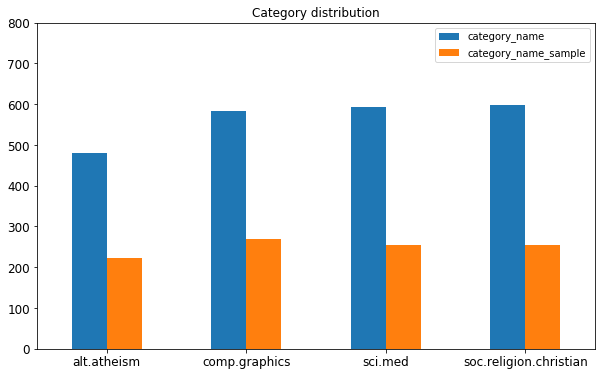

In [92]:
#Answer here
a=pd.concat([X.category_name.value_counts(), X_sample.category_name.value_counts()], axis=1)
a.plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 800],
                                           rot = 0, fontsize = 12, figsize = (10,6))
plt.legend( labels = ['category_name', 'category_name_sample'], loc = 'best')


### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [106]:
# Answer here
for i in range(5):
    for j in range(100):
        if X_counts[0:5,0:100].toarray()[i,j]==1 :
            print(i,j)
            print (count_vect.get_feature_names()[j])


4 0
00
4 37
01


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [233]:
a=np.zeros(35788)
b=np.zeros(35788)
c=np.zeros(35788)
d=np.zeros(35788)

for i in range(2257):
    if X.iloc[i,1]==0:
        a=a+X_counts[i,:].toarray()
    elif X.iloc[i,1]==1:
        b=b+X_counts[i,:].toarray()
    elif X.iloc[i,1]==2:
        c=c+X_counts[i,:].toarray()
    elif X.iloc[i,1]==3:
        d=d+X_counts[i,:].toarray()

In [235]:
total=np.concatenate((a, b,c,d), axis=0)

In [253]:
plot_y1 = ["category_"+ str(i) for i in list(X.index)[0:4]]

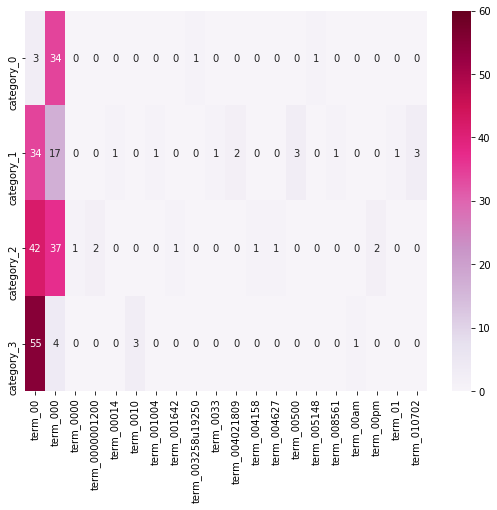

In [254]:
df_todraw = pd.DataFrame(total[0:4, 0:20], columns =  ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]], index = plot_y1)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=60, annot=True)

---

The great thing about what we have done so far is that we now open doors to new problems. Let us be optimistic. Even though we have the problem of sparsity and a very high dimensional data, we are now closer to uncovering wonders from the data. You see, the price you pay for the hard work is worth it because now you are gaining a lot of knowledge from what was just a list of what appeared to be irrelevant articles. Just the fact that you can blow up the data and find out interesting characteristics about the dataset in just a couple lines of code, is something that truly inspires me to practise Data Science. That's the motivation right there!

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [121]:
# Answer here
X_reduced1 = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced1.shape)
categories


(2257, 3)


['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

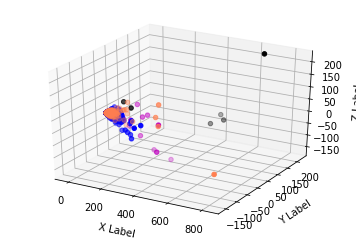

In [122]:
from mpl_toolkits.mplot3d import Axes3D
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced1[X['category_name'] == category].T[0]
    ys = X_reduced1[X['category_name'] == category].T[1]
    zs = X_reduced1[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys,zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')


plt.show()

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

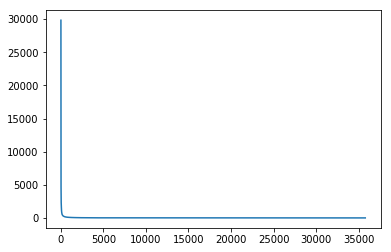

In [131]:
# Answer here
#term_frequencies.shape
#np.sort(term_frequencies).shape

aaa=np.arange(1,35789,1)
#print(term_frequencies[::-1].sort())
np.sort(term_frequencies)[::-1]

plt.plot(aaa,np.sort(term_frequencies)[::-1]) 
#plot(np.sort(term_frequencies))


### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [173]:
# Answer here
X['bin_category'] = mlb.transform(X['category_name']).tolist()

In [174]:
X[0:9]

,text,category,category_name,unigrams,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 0, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 0, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 0]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 0]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 0]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 0]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 0]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 0, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 0, 0]"


###  Part 2 New dataset (Lab 1 operation)

In [1]:
%load_ext autoreload
%autoreload 2


read 3 dataset


In [2]:
#file_object  = open('C:\Users\pkw\Documents\amazon_cells_labelled.txt', 'r')
filename = 'amazon_cells_labelled.txt'
f = open(filename, 'r')
filename1 = 'imdb_labelled.txt'
f = open(filename1, 'r')
filename2 = 'yelp_labelled.txt'
f = open(filename2, 'r')


In [3]:
import pandas as pd

In [4]:
#read txt to dataframe and add new column name "text"
df_amazon = pd.read_fwf('amazon_cells_labelled.txt')
df_amazon.columns = ['text']
# because first sentence be recognize as column name
df_amazon.loc[-1] = ['So there is no way for me to plug it in here in the US unless I go by a converter. \t0']  #adding a row
df_amazon.index = df_amazon.index + 1  # shifting index
df_amazon= df_amazon.sort_index()  # sorting by index
df_amazon1 = pd.DataFrame(df_amazon.text.str.split('\t',1).tolist(),
                                   columns = ['text','label'])




In [5]:
df_amazon1[0:10]

,text,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [6]:
len(df_amazon1)

1000

In [7]:
df_imdb = pd.read_fwf('imdb_labelled.txt')
df_imdb=df_imdb.drop(['Unnamed: 1', 'Unnamed: 2','Unnamed: 3'], axis=1)
#df_imdb.columns = ['123']
df_imdb.columns = ['text']
# because first sentence be recognize as column name
df_imdb.loc[-1] = ['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.\t0']  #adding a row
df_imdb.index = df_imdb.index + 1  # shifting index
df_imdb= df_imdb.sort_index()  # sorting by index
#add new label column
df_imdb1 = pd.DataFrame(df_imdb.text.str.split('\t',1).tolist(),
                                   columns = ['text','label'])

In [8]:
df_imdb1[0:10]

,text,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


In [9]:
len(df_imdb1)

1000

In [10]:

df_yelp = pd.read_fwf('yelp_labelled.txt')
#df_yelp.columns = ['text']
df_yelp=df_yelp.drop(['Unnamed: 1', 'Unnamed: 2'], axis=1)

df_yelp.columns = ['text']
# because first sentence be recognize as column name
df_yelp.loc[-1] = ['Wow... Loved this place.\t1']  #adding a row
df_yelp.index = df_yelp.index + 1  # shifting index
df_yelp= df_yelp.sort_index()  # sorting by index
#add new label column
df_yelp1 = pd.DataFrame(df_yelp.text.str.split('\t',1).tolist(),
                                   columns = ['text','label'])


In [11]:
df_yelp1[0:10]

,text,label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [12]:
len(df_yelp1)

1000

In [13]:
import numpy as np
#combine 3 data set
frames = [df_amazon1, df_imdb1, df_yelp1]

df_all = pd.concat(frames)



In [14]:
#set new index
df_all=df_all.set_index(np.arange(len(df_all)))


In [15]:
df_all

,text,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [16]:
len(df_all)



3000

In [17]:
df_all.iloc[::100][0:30]

,text,label
0,So there is no way for me to plug it in here i...,0
100,Integrated seamlessly with the Motorola RAZR p...,1
200,The color is even prettier than I thought it w...,1
300,Sending it back.,0
400,what a disappointment,0
500,"The bose noise cancelling is amazing, which is...",1
600,Their Research and Development division obviou...,1
700,"Also, the phone doesn't seem to accept anythin...",0
800,"Good , works fine.",1
900,"This was utterly confusing at first, which cau...",0


In [18]:
df_all.isnull()

,text,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [19]:
"""
Helper functions for data mining lab session 2017 Fall
Notations:
d - document
D - documents
V - vowels
w - word
W - words
l - letter
"""
#import ta helper
def format_rows(docs):
    """ format the text field and strip special characters """
    D = []
    for d in docs.data:
        temp_d = " ".join(d.split("\n")).strip('\n\t')
        D.append([temp_d])
    return D

def format_labels(target, docs):
    """ format the labels """
    return docs.target_names[target]

def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return ("The amoung of missing records is: ", counter)

def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

In [20]:
#check how many missing value
df_all.isnull().apply(lambda x:check_missing_values(x))

text      (The amoung of missing records is: , 0)
label    (The amoung of missing records is: , 56)
dtype: object

In [21]:
#eliminate missing value
df_all.dropna(inplace=True)

In [22]:
df_all.isnull().apply(lambda x:check_missing_values(x))


text     (The amoung of missing records is: , 0)
label    (The amoung of missing records is: , 0)
dtype: object

In [23]:
len(df_all)

2944

In [24]:
#check duplicated
a=df_all.duplicated()


In [25]:
#check how many duplicated
sum(df_all.duplicated('text'))

17

In [26]:
#check what same comment in data
for i in range(len(a)):
    if a.iloc[i]==True:
        print(df_all.iloc[i])
# I prefer not to drop duplicate data, cause in online shopping people might   
#have same comment 

text     Great phone!.
label                1
Name: 285, dtype: object
text     Works great.
label               1
Name: 407, dtype: object
text     Works great!.
label                1
Name: 524, dtype: object
text     Don't buy this product.
label                          0
Name: 543, dtype: object
text     If you like a loud buzzing to override all you...
label                                                    0
Name: 744, dtype: object
text     Does not fit.
label                0
Name: 748, dtype: object
text     This is a great deal.
label                        1
Name: 778, dtype: object
text     Great Phone.
label               1
Name: 792, dtype: object
text     Excellent product for the price.
label                                   1
Name: 892, dtype: object
text     Great phone.
label               1
Name: 896, dtype: object
text     Definitely worth checking out.  
label                                   1
Name: 1363, dtype: object
text     Not recommended.  
label       

In [27]:
df_all_sample = df_all.sample(n=1000)

In [28]:
len(df_all_sample)

1000

In [29]:
df_all_sample[0:4]

,text,label
1565,"This convention never worked well in the past,...",0
1347,""" But ""Storm Trooper"" is not even bad enough t...",0
2339,There is nothing authentic about this place.,0
1116,And generally the lines and plot is weaker tha...,0


0    1475
1    1469
Name: label, dtype: int64


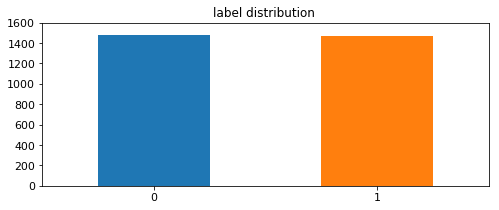

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
print(df_all.label.value_counts())

df_all.label.value_counts().plot(kind = 'bar',
                                    title = 'label distribution ',
                                    ylim = [0, 1600],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

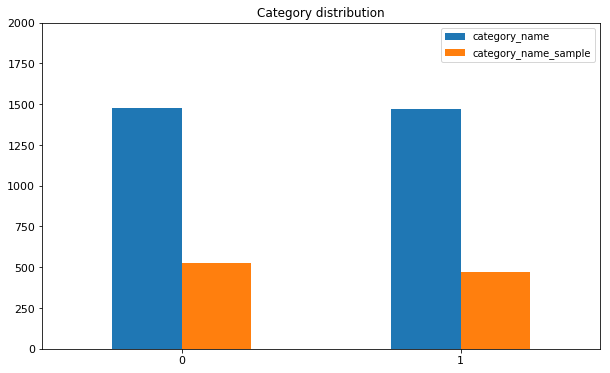

In [31]:
a=pd.concat([df_all.label.value_counts(), df_all_sample.label.value_counts()], axis=1)
a.plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 2000],
                                           rot = 0, fontsize = 11, figsize = (10,6))
plt.legend( labels = ['category_name', 'category_name_sample'], loc = 'best')


In [32]:
import nltk

In [33]:
nltk.download('punkt')
df_all['unigrams'] = df_all['text'].apply(lambda x: tokenize_text(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pkw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [34]:
df_all[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_all_counts = count_vect.fit_transform(df_all.text)

In [36]:
df_all_counts

<2944x4852 sparse matrix of type '<class 'numpy.int64'>'
	with 29809 stored elements in Compressed Sparse Row format>

In [37]:
df_all_counts.shape

(2944, 4852)

In [38]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '17', '18']

In [39]:
df_all

,text,label,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,"[The, mic, is, great, .]"
5,I have to jiggle the plug to get it to line up...,0,"[I, have, to, jiggle, the, plug, to, get, it, ..."
6,If you have several dozen or several hundred c...,0,"[If, you, have, several, dozen, or, several, h..."
7,If you are Razr owner...you must have this!,1,"[If, you, are, Razr, owner, ..., you, must, ha..."
8,"Needless to say, I wasted my money.",0,"[Needless, to, say, ,, I, wasted, my, money, .]"
9,What a waste of money and time!.,0,"[What, a, waste, of, money, and, time, !, .]"


In [40]:
df_all_counts[0:10,0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [41]:
#find which array and which component is 1 and find its corresponding vocabulary 
for i in range(10):
    for j in range(100):
        if df_all_counts[0:10,0:100].toarray()[i,j]==1 :
            print(i,j)
            print (count_vect.get_feature_names()[j])

3 43
45


In [42]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:50]]

In [43]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1986',
 'term_1995',
 'term_1998',
 'term_20',
 'term_2000',
 'term_2005',
 'term_2006',
 'term_2007',
 'term_20th',
 'term_2160',
 'term_23',
 'term_24',
 'term_25',
 'term_2mp',
 'term_30',
 'term_30s',
 'term_325',
 'term_35',
 'term_350',
 'term_375',
 'term_3o',
 'term_40',
 'term_40min',
 'term_42',
 'term_44',
 'term_45',
 'term_4s',
 'term_4ths',
 'term_50',
 'term_5020',
 'term_510',
 'term_5320']

In [44]:
plot_y = ["doc_"+ str(i) for i in list(df_all.index)[0:50]]

In [45]:
plot_z = df_all_counts[0:50, 0:50].toarray()

In [46]:
plot_z.shape

(50, 50)

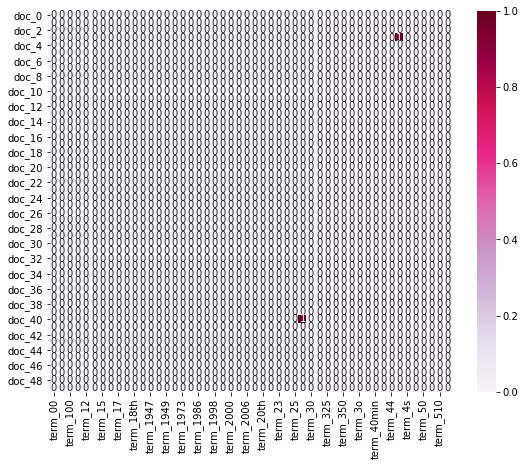

In [47]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [48]:
from sklearn.decomposition import PCA

In [49]:
df_all_reduced = PCA(n_components = 2).fit_transform(df_all_counts.toarray())

In [50]:
df_all_reduced.shape

(2944, 2)

In [51]:
label = ['1',  '0']

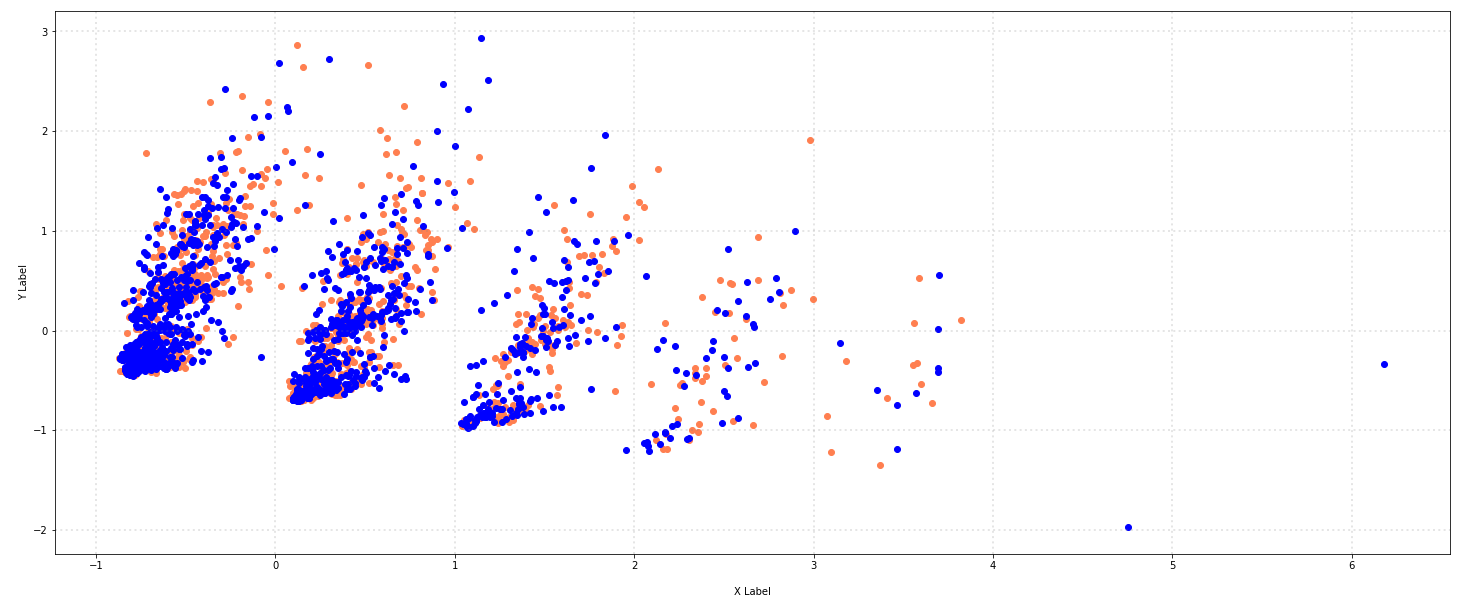

In [52]:
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, label):
    xs = df_all_reduced[df_all['label'] == category].T[0]
    ys = df_all_reduced[df_all['label'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [53]:
#pca to 3 dimension

df_all_reduced1 = PCA(n_components = 3).fit_transform(df_all_counts.toarray())
print(df_all_reduced1.shape)
label

(2944, 3)


['1', '0']

<Figure size 1800x720 with 0 Axes>

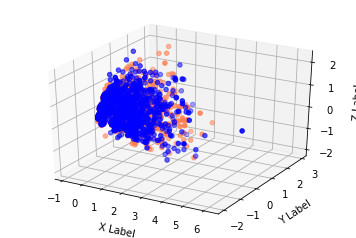

In [54]:
from mpl_toolkits.mplot3d import Axes3D
col = ['coral', 'blue']
fig = plt.figure(figsize = (25,10))
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, label):
    xs = df_all_reduced1[df_all['label'] == category].T[0]
    ys = df_all_reduced1[df_all['label'] == category].T[1]
    zs = df_all_reduced1[df_all['label'] == category].T[2]
   
    ax.scatter(xs, ys,zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')


plt.show()

In [55]:
term_frequencies = []
for j in range(0,df_all_counts.shape[1]):
    term_frequencies.append(sum(df_all_counts[:,j].toarray()))

In [56]:
term_frequencies = np.asarray(df_all_counts.sum(axis=0))[0]

In [57]:
term_frequencies[0]

1

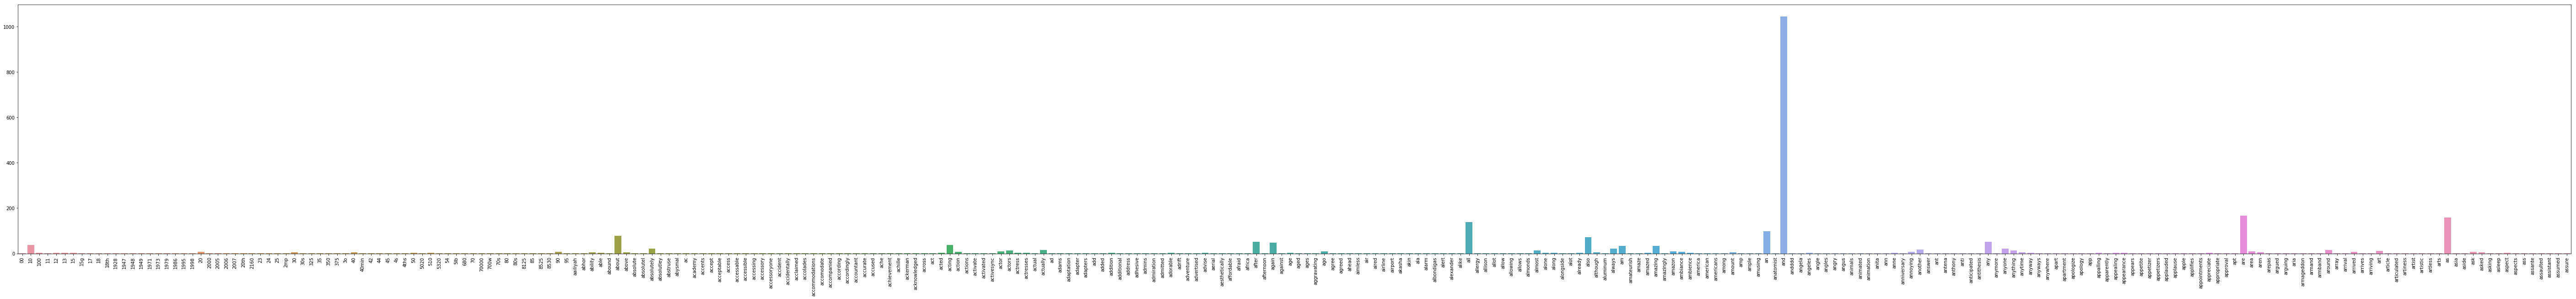

In [58]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [59]:
def get_tokens_and_frequency(token_list):
    """obtain word frequecy from pandas dataframe column of lists"""
    counter = Counter(token_list)
    counter = OrderedDict(counter.most_common()) # sort by value
    tokens = counter.keys()
    tokens_count = counter.values()

    return tokens, tokens_count

def compute_frequencies(train_data, emotion, feature, frequency=True):
    """ compute word frequency for pandas datafram column of lists"""
    tokens =  train_data.loc[(train_data["emotions"] == emotion)][feature].values.tolist()
    tokens = [item for l in tokens for item in l]
    if frequency:
        return get_tokens_and_frequency(tokens)
    else:
        return tokens

###################################
""" Visualizing Functions """
###################################
def plot_word_frequency(word_list, plot_title):
    trace1 = {
        "x": list(word_list[0]),
        "y": list(word_list[1]),
        "type": "bar"
    }

    data = go.Data([trace1])

    layout = {
        "title": plot_title,
        "yaxis": {"title": "Frequency"}
    }

    fig = go.Figure(data = data, layout=layout)
    return fig

def plot_heat_map(plot_x, plot_y, plot_z):
    """ Helper to plot heat map """
    trace = {
        "x": plot_x,
        "y": plot_y,
        "z": plot_z,
        "colorscale": [[0.0, "rgb(158,1,66)"], [0.1, "rgb(213,62,79)"], [0.2, "rgb(244,109,67)"], [0.3, "rgb(253,174,97)"], [0.4, "rgb(254,224,139)"], [0.5, "rgb(255,255,191)"], [0.6, "rgb(230,245,152)"], [0.7, "rgb(171,221,164)"], [0.8, "rgb(102,194,165)"], [0.9, "rgb(50,136,189)"], [1.0, "rgb(94,79,162)"]],
        "type": "heatmap"
    }

    data = go.Data([trace])
    layout = {
        "legend": {
            "bgcolor": "#F5F6F9",
            "font": {"color": "#4D5663"}
        },
        "paper_bgcolor": "#F5F6F9",
        "plot_bgcolor": "#F5F6F9",
        "xaxis1": {
            "gridcolor": "#E1E5ED",
            "tickfont": {"color": "#4D5663"},
            "title": "",
            "titlefont": {"color": "#4D5663"},
            "zerolinecolor": "#E1E5ED"
        },
        "yaxis1": {
            "gridcolor": "#E1E5ED",
            "tickfont": {"color": "#4D5663"},
            "title": "",
            "titlefont": {"color": "#4D5663"},
            "zeroline": False,
            "zerolinecolor": "#E1E5ED"
        }
    }

    fig = go.Figure(data = data, layout=layout)
    return fig

def get_trace(X_pca, data, category, color):
    """ Build trace for plotly chart based on category """
    trace = go.Scatter3d(
        x=X_pca[data.apply(lambda x: True if x==category else False), 0],
        y=X_pca[data.apply(lambda x: True if x==category else False),1],
        z=X_pca[data.apply(lambda x: True if x==category else False),2],
        mode='markers',
        marker=dict(
            size=4,
            line=dict(
                color=color,
                width=0.2
            ),
            opacity=0.8
        ),
        text=data[data.apply(lambda x: True if x==category else False).tolist()]
    )
    return trace

def plot_word_cloud(text):
    """ Generate word cloud given some input text doc """
    word_cloud = WordCloud().generate(text)
    plt.figure(figsize=(8,6), dpi=90)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

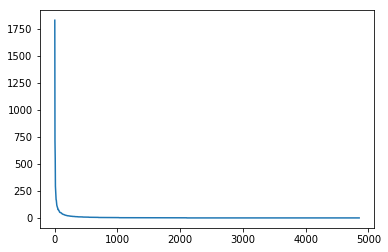

In [60]:
# Answer here
#term_frequencies.shape
#np.sort(term_frequencies).shape

aaa=np.arange(1,4853,1)
#print(term_frequencies[::-1].sort())
np.sort(term_frequencies)[::-1]

plt.plot(aaa,np.sort(term_frequencies)[::-1]) 
#plot(np.sort(term_frequencies))

In [61]:
term_frequencies.shape

(4852,)

In [62]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

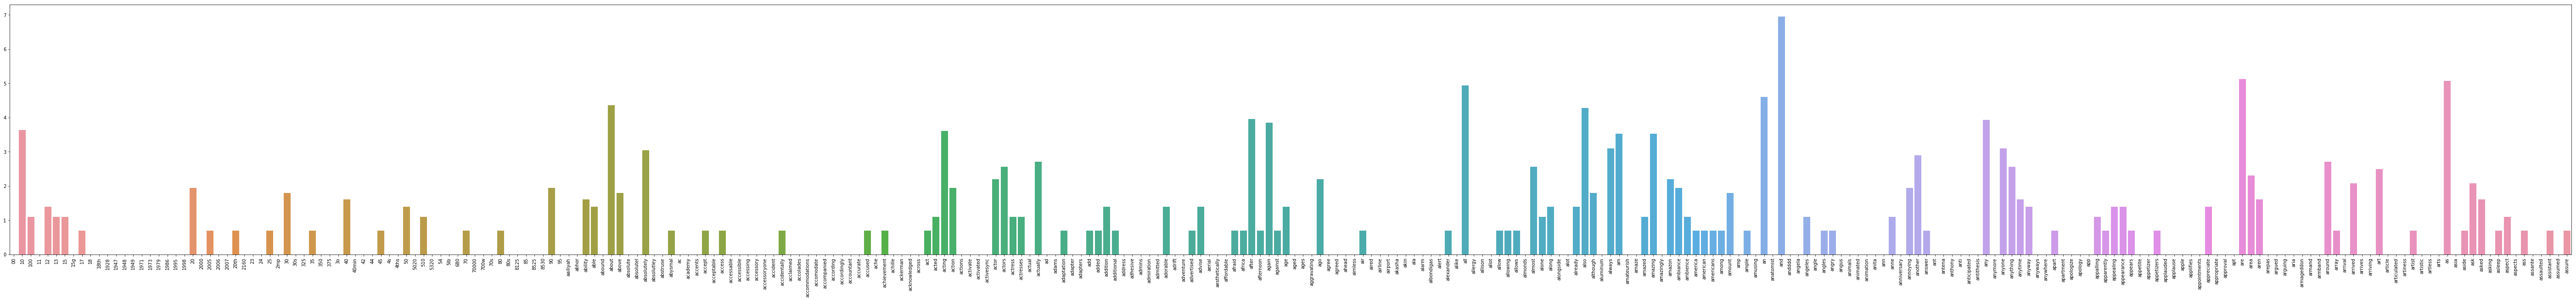

In [63]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [64]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [65]:
mlb = preprocessing.LabelBinarizer()

In [66]:
mlb.fit(df_all.label)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [67]:
mlb.classes_

array(['0', '1'], dtype='<U1')

In [68]:
df_all['bin_category'] = mlb.transform(df_all['label']).tolist()

In [69]:
df_all[0:10]

,text,label,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]
9,What a waste of money and time!.,0,"[What, a, waste, of, money, and, time, !, .]",[0]


### ** >>> Visualiztion** 


In [252]:
a=np.zeros(4852)
b=np.zeros(4852)

for i in range(2944):
    if df_all.iloc[i,1]=='0':
        a=a+df_all_counts[i,:].toarray()
    elif df_all.iloc[i,1]=='1':
        b=b+df_all_counts[i,:].toarray()
total=np.concatenate((a, b), axis=0)
a=a.flatten()
b=b.flatten()
ab=np.add(a,b)

In [253]:
for i in range(20):
    print(count_vect.get_feature_names()[a_ind[i]])    

(4852,)

In [226]:
ind = np.argpartition(a,-20)[-20:]

In [227]:
a_ind=ind[np.argsort(-a[ind])]

In [228]:
a_ind

array([4261,  207, 2285, 4336, 2281, 4287, 4674, 2907, 2873, 2174, 1718,
       4259, 2799, 4837, 4771, 2929,  601, 4601,  358, 2772], dtype=int64)

In [268]:
word20a=[]
word20b=[]
aa=[]
for i in range(20):
    word20a.append(count_vect.get_feature_names()[a_ind[i]])     
    word20b.append(count_vect.get_feature_names()[b_ind[i]])   
    aa.append(i+1)

In [269]:
aa

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [274]:
d = {'Rank':aa,'label: 0': word20a, 'label: 1':word20b}
df20 = pd.DataFrame(data=d)
df20=df20.set_index('Rank')


In [235]:
ind = np.argpartition(b,-20)[-20:]

In [236]:
b_ind=ind[np.argsort(-b[ind])]

In [238]:
for i in range(20):
    print(count_vect.get_feature_names()[b_ind[i]])               
                           

the
and
is
it
this
of
to
was
in
great
good
for
with
very
my
that
you
on
film
are



### ** >>>  most 20 freq words in label:0 and label:1** 


In [275]:
df20

,label: 0,label: 1
Rank,,
1,the,the
2,and,and
3,it,is
4,to,it
5,is,this
6,this,of
7,was,to
8,of,was
9,not,in


### ** >>>  TFIDF PART** 

In [70]:
# coding:utf-8  
from sklearn.feature_extraction.text import CountVectorizer  



from sklearn.feature_extraction.text import TfidfTransformer  

#类调用  
transformer = TfidfTransformer()  
#print (transformer)  
#将词频矩阵X统计成TF-IDF值  
tfidf = transformer.fit_transform(df_all_counts.toarray())  
#查看数据结构 tfidf[i][j]表示i类文本中的tf-idf权重  
print (tfidf.toarray() ) 
#print(tfidf.toarray().shape)
print (tfidf.toarray().shape ) 



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(2944, 4852)


In [89]:
tfidf.toarray()[0,:].shape
               

(4852,)

In [87]:
import sklearn

In [92]:
cos_sim=sklearn.metrics.pairwise.cosine_similarity(tfidf.toarray(), dense_output=True)


### ** >>> Cosine similarity Part** 

In [96]:
print(cos_sim)


[[1.         0.         0.07306141 ... 0.07939063 0.07681417 0.14236572]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.07306141 0.         1.         ... 0.         0.01704498 0.03795675]
 ...
 [0.07939063 0.         0.         ... 1.         0.12127777 0.        ]
 [0.07681417 0.         0.01704498 ... 0.12127777 1.         0.05953335]
 [0.14236572 0.         0.03795675 ... 0.         0.05953335 1.        ]]



### ** >>>Naive bayes** 

In [79]:
#naive bayes using tfidf
#Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
import numpy as np

#assigning predictor and target variables
x=  tfidf.toarray()
y= np.reshape(df_all.iloc[:,1].values, (2944, 1))
#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(x, y)

#Predict Output 
predicted= model.predict(x)
print (predicted)
predicted=predicted.astype(int)

C:\Users\pkw\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['0' '1' '1' ... '0' '0' '0']


In [80]:
#naive bayes using word frequency


#assigning predictor and target variables
x1=  df_all_counts.toarray()
y1= np.reshape(df_all.iloc[:,1].values, (2944, 1))
#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(x1, y1)

#Predict Output 
predicted1= model.predict(x)
print (predicted1)
predicted1=predicted1.astype(int)

C:\Users\pkw\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['0' '1' '1' ... '0' '0' '0']


In [81]:
#add predict label
df_all['predict label'] = pd.Series(predicted , index=df_all.index)

In [82]:
df_all['predict label word_f'] = pd.Series(predicted1 , index=df_all.index)

In [83]:
#count how many error from tfidf
label_og=df_all.iloc[:,1].values.astype(int)
a=np.subtract(label_og,predicted)
error_tfidf=0
for i in range(2944):
    if a[i]!=0:
        error_tfidf=error_tfidf+1
        
print('error_tfidf',error_tfidf)
#count how many error from word frequency
a1=np.subtract(label_og,predicted1)
error_wf=0
for i in range(2944):
    if a1[i]!=0:
        error_wf=error_wf+1
        
print('error_wf',error_wf)

error_tfidf 97
error_wf 350



### ** >>>Accuracy using tfidf= (2994-97)/2994=96.76%** 
### ** >>>Accuracy using word frequency= (2994-350)/2994=88.31%** 


In [84]:
df_all[0:10]

,text,label,unigrams,bin_category,predict label,predict label word_f
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...",[0],0,0
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]",[1],1,1
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]",[1],1,1
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...",[0],0,0
4,The mic is great.,1,"[The, mic, is, great, .]",[1],1,0
5,I have to jiggle the plug to get it to line up...,0,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0],0,0
6,If you have several dozen or several hundred c...,0,"[If, you, have, several, dozen, or, several, h...",[0],0,0
7,If you are Razr owner...you must have this!,1,"[If, you, are, Razr, owner, ..., you, must, ha...",[1],1,1
8,"Needless to say, I wasted my money.",0,"[Needless, to, say, ,, I, wasted, my, money, .]",[0],0,0
9,What a waste of money and time!.,0,"[What, a, waste, of, money, and, time, !, .]",[0],0,0
